# Analise de Vendas de produtos para tomadas de decisão baseado em analise de dados aplicando modelo de inteligência artificial

In [3]:
#import pandas as pd
#import seaborn as sns

In [3]:
# 📦 Imports
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl




In [7]:
# 📥 Carregamento dos dados
# o codigo abaixo abre o dataset em um aqruivo excel.
df = pd.read_excel('dataset_vendasProduto.xlsx', parse_dates=["data_da_venda"])
# a linha acima carrega o arquivo excel e converte a coluna "data_da_venda" para o tipo datetime.


In [2]:
! pip install statsmodels -q
# o codigo acima instala a biblioteca statsmodels, que é usada para análise estatística.
# 📊 Análise Exploratória

In [5]:
# Configurar o estilo dos gráficos
# O código abaixo define o estilo dos gráficos para "whitegrid", que é um estilo com grade branca.
sns.set_theme(style="whitegrid")
# O código abaixo define a paleta de cores dos gráficos para "pastel", que é uma paleta de cores suaves.
sns.set_palette('pastel')

## 📥 Etapa 2 – Carregando e Explorando o Dataset


In [8]:
# 🗂️ Visualização inicial
df.head() # essa linha exibe as primeiras 5 linhas do DataFrame, permitindo uma visualização inicial dos dados.

# 🧩 Verificando tipos de dados
df.info()
# o código acima exibe informações sobre o DataFrame, incluindo o número de entradas, tipos de dados e valores não nulos.
df.describe()
# o código acima exibe as estatísticas descritivas dos dados numéricos, como média, desvio padrão, valores mínimo e máximo, etc.

# o codigo abaixo verifica se existem valores ausentes (NaN) no DataFrame.
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_da_venda                  28012 non-null  datetime64[ns]
 1   categoria                      28012 non-null  object        
 2   produto                        28012 non-null  object        
 3   fabricante                     28012 non-null  object        
 4   profissional_remunerado        28012 non-null  object        
 5   cliente                        28012 non-null  object        
 6   email                          10234 non-null  object        
 7   status_nfce                    28012 non-null  object        
 8   n_da_nfce                      27234 non-null  float64       
 9   codigo_de_acesso_sefaz         27227 non-null  object        
 10  preco_unitario                 28012 non-null  float64       
 11  qtde           

data_da_venda                        0
categoria                            0
produto                              0
fabricante                           0
profissional_remunerado              0
cliente                              0
email                            17778
status_nfce                          0
n_da_nfce                          778
codigo_de_acesso_sefaz             785
preco_unitario                       0
qtde                                 0
subtotal                             0
desconto                             0
total                                0
total_pago_a_descontar_prof          0
motivo_desconto                  28012
observacoes                      28012
custo_medio_atual_do_produto         0
custo_medio_produto_vendido          0
valor_ultima_compra              19275
tipo_de_tributacao_do_produto        0
dtype: int64

### 🔍 Observações iniciais
- A coluna `data_da_venda` foi corretamente interpretada como data.
- As colunas numéricas estão com tipos corretos.
- `motivo_desconto` tem valores ausentes em 100% dos casos.


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\2584446427.py:10: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\2584446427.py:10: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


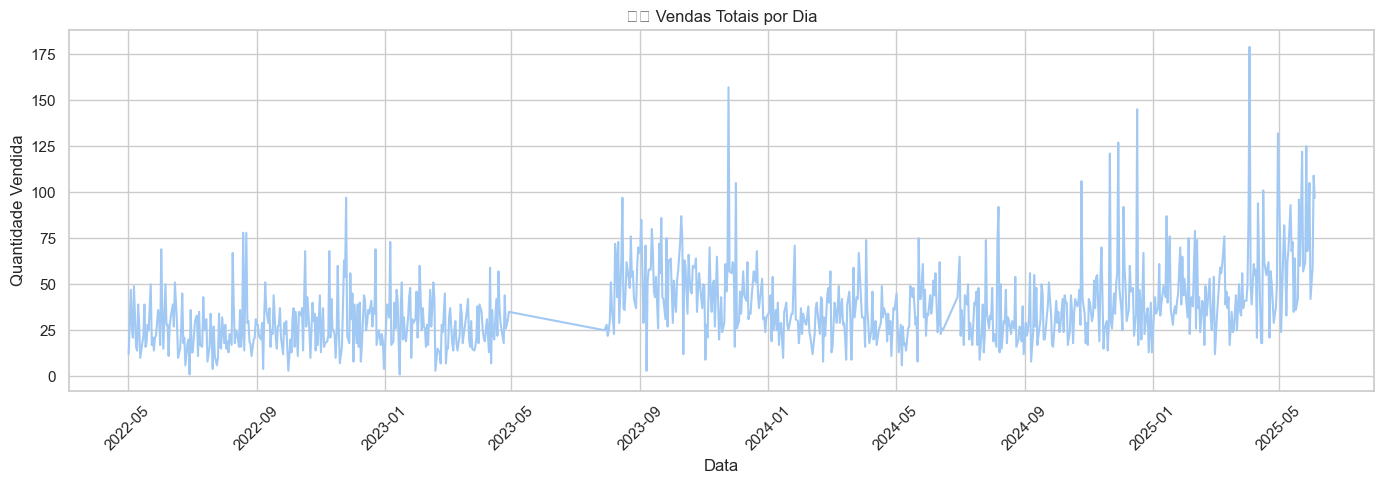

In [ ]:
vendas_diarias = df.groupby("data_da_venda")["qtde"].sum().reset_index()

# Visualização
plt.figure(figsize=(14, 5))
sns.lineplot(data=vendas_diarias, x="data_da_venda", y="qtde")
plt.title("Vendas Totais por Dia")
plt.xlabel("Data")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\3289624012.py:9: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


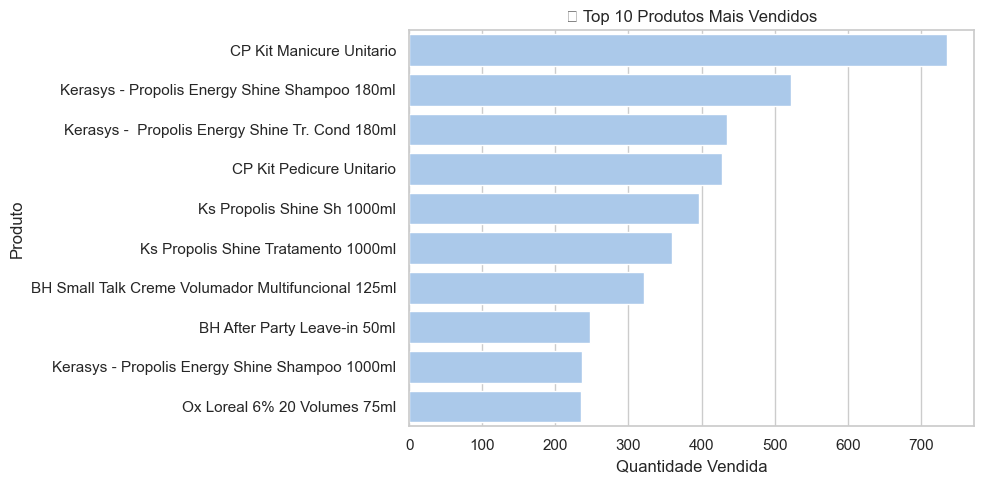

In [10]:
top_produtos = df.groupby("produto")["qtde"].sum().sort_values(ascending=False).head(10)

# Visualização
plt.figure(figsize=(10, 5))
sns.barplot(x=top_produtos.values, y=top_produtos.index)
plt.title("🏆 Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\670780501.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


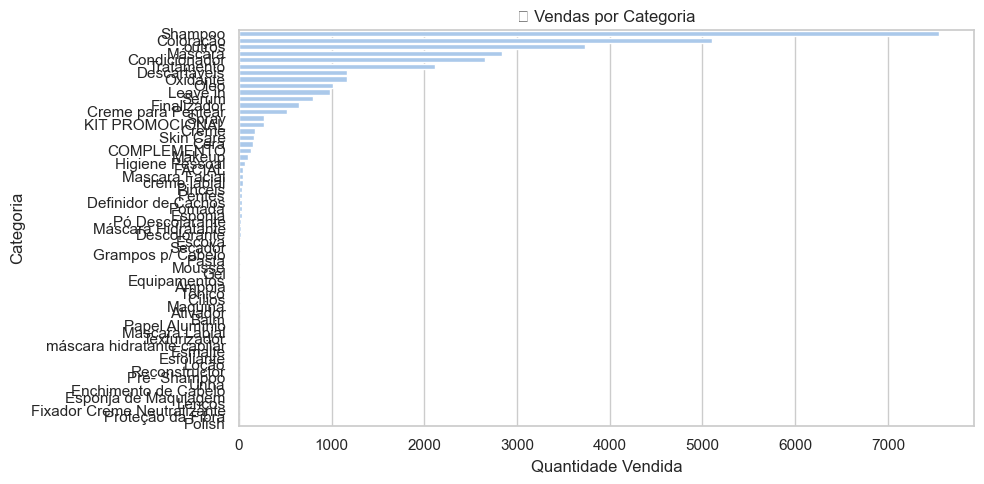

In [11]:
vendas_categoria = df.groupby("categoria")["qtde"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=vendas_categoria.values, y=vendas_categoria.index)
plt.title("📦 Vendas por Categoria")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\3489382393.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


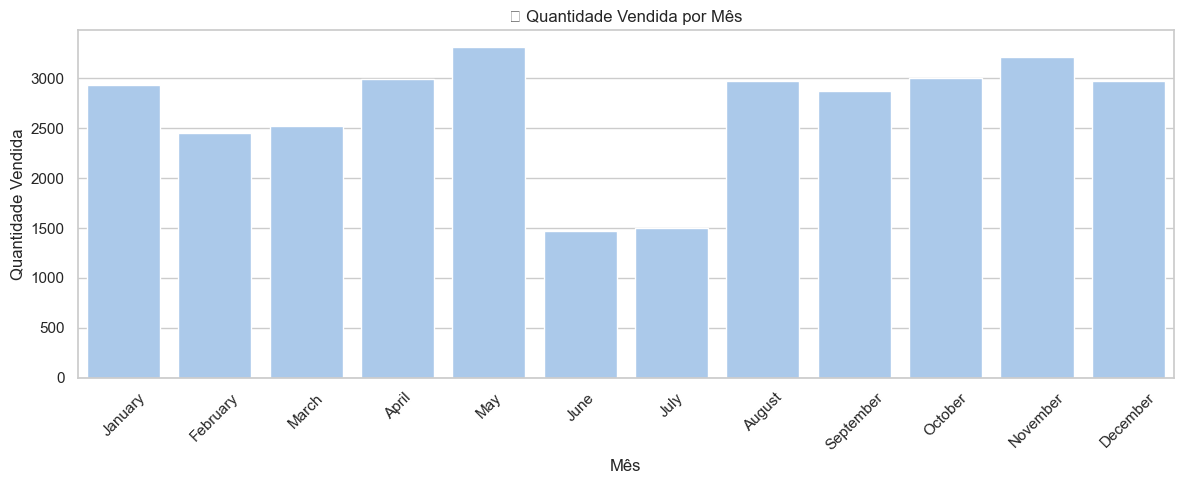

In [12]:
# Extrair mês
df["mes"] = df["data_da_venda"].dt.month_name()

vendas_por_mes = df.groupby("mes")["qtde"].sum()
# Ordenar os meses corretamente
meses_ordenados = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
vendas_por_mes = vendas_por_mes.reindex(meses_ordenados)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=vendas_por_mes.index, y=vendas_por_mes.values)
plt.title("📅 Quantidade Vendida por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\3671267808.py:13: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


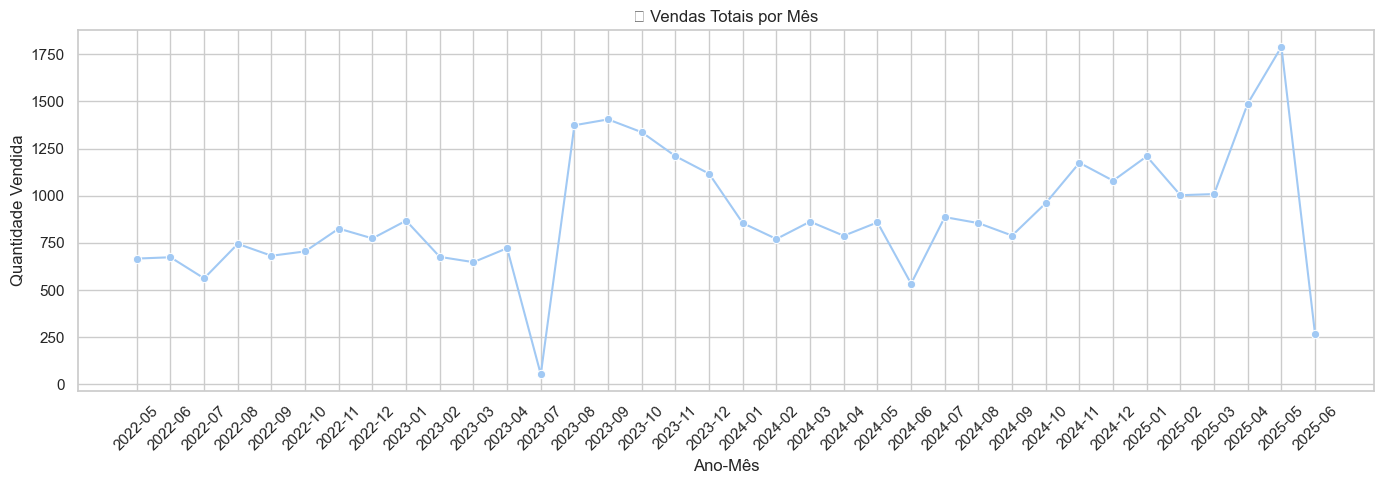

In [13]:
# Criar coluna "ano_mes"
df["ano_mes"] = df["data_da_venda"].dt.to_period("M").astype(str)

vendas_mensais = df.groupby("ano_mes")["qtde"].sum().reset_index()

# Gráfico
plt.figure(figsize=(14, 5))
sns.lineplot(data=vendas_mensais, x="ano_mes", y="qtde", marker='o')
plt.title("📅 Vendas Totais por Mês")
plt.xlabel("Ano-Mês")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\1675282379.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


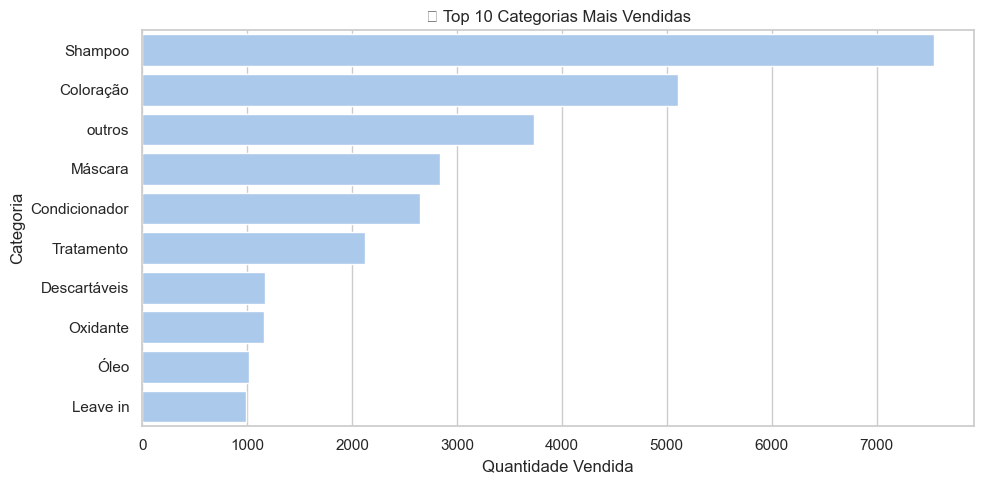

In [14]:
# Top 10 categorias
top_categorias = df.groupby("categoria")["qtde"].sum().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categorias.values, y=top_categorias.index)
plt.title("📦 Top 10 Categorias Mais Vendidas")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\2445554833.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


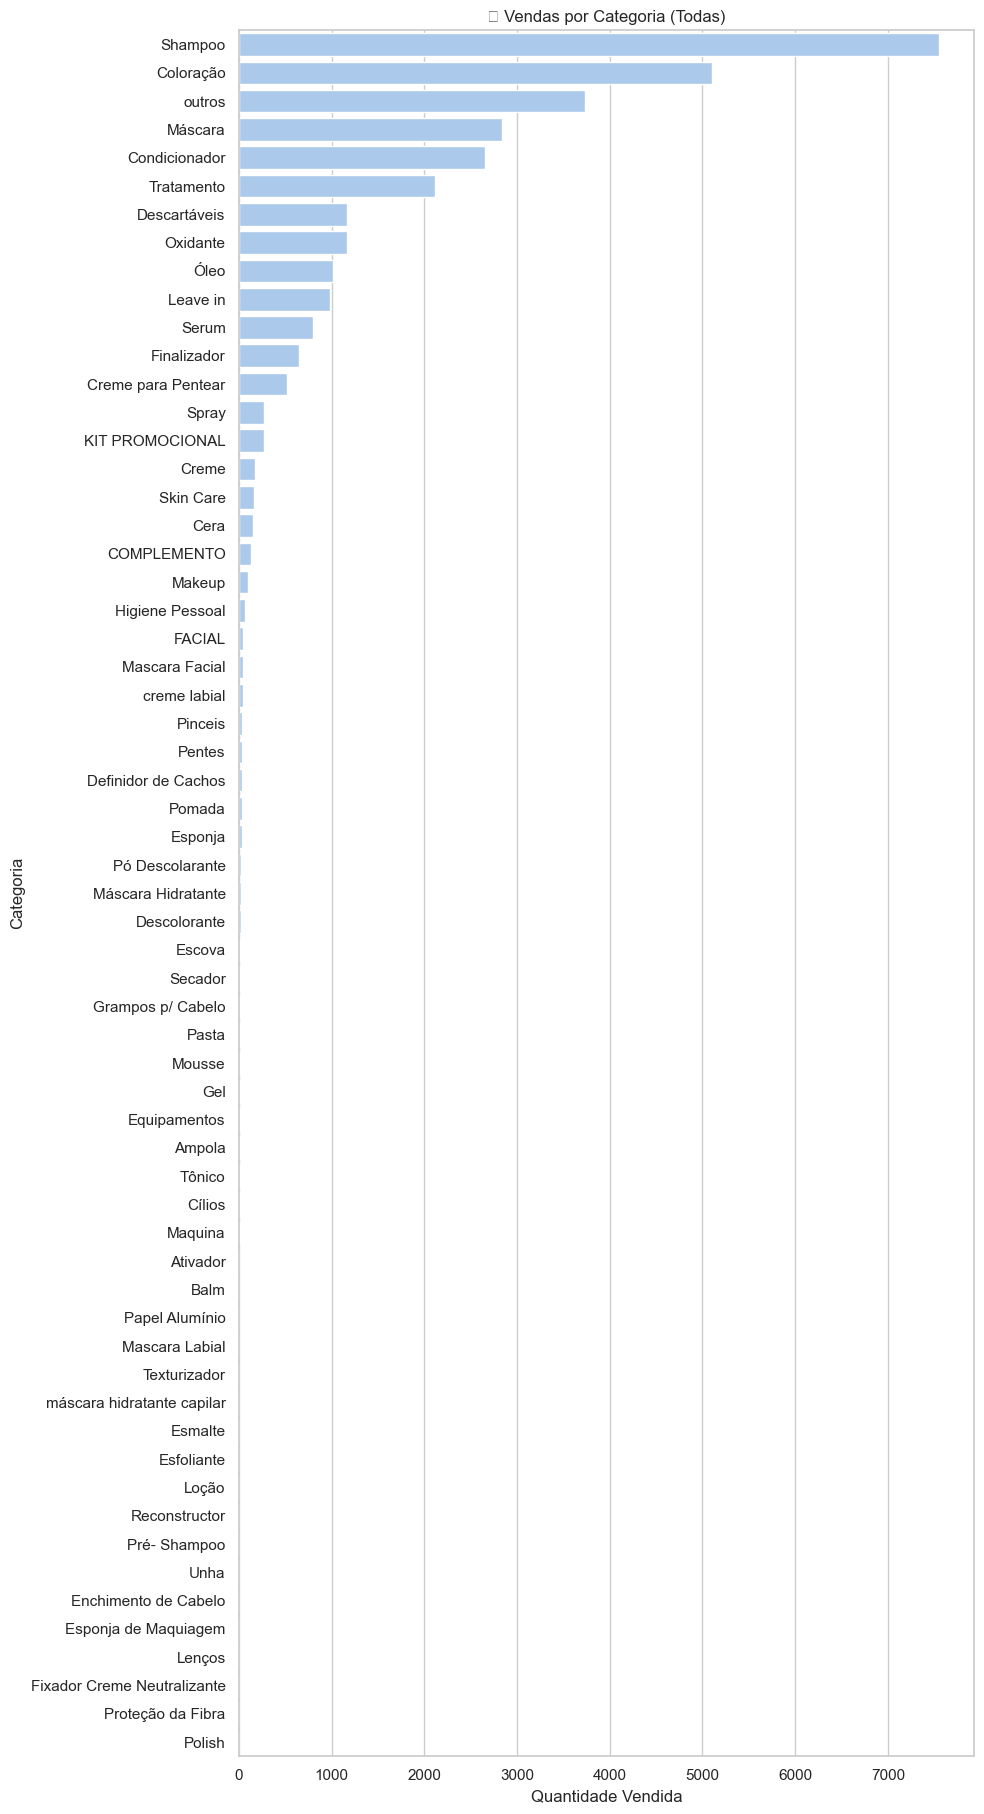

In [15]:
vendas_categoria = df.groupby("categoria")["qtde"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, len(vendas_categoria) * 0.3))
sns.barplot(x=vendas_categoria.values, y=vendas_categoria.index)
plt.title("📦 Vendas por Categoria (Todas)")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


In [16]:
# Agrupar por data e produto
df_vendas = df.groupby(["data_da_venda", "produto"])["qtde"].sum().reset_index()
df_vendas = df_vendas.sort_values(["produto", "data_da_venda"])
df_vendas.head()


,data_da_venda,produto,qtde
1438,2022-07-30,10 Ampolas Anti-Chute 10x6,1
6076,2023-04-26,1922 Deep-Cleasing Shampoo Keune 250ml,1
7169,2023-09-01,1922 Essential Shampoo Keune 250ml,1
13225,2024-05-15,1922 Premier Paste Keune 75ml,1
9219,2023-11-09,1922 Refreshing Shampoo Keune 250ml,1


In [17]:
produtos_mais_vendidos = df_vendas["produto"].value_counts().head(10)
print(produtos_mais_vendidos)


produto
Ks Propolis Shine Sh 1000ml                           242
Ks Propolis Shine Tratamento 1000ml                   235
Kerasys - Propolis Energy Shine Shampoo 180ml         205
BH Small Talk Creme Volumador Multifuncional 125ml    177
IM Light Serum 30ml                                   160
KS Heat Active Damage Repair 200ml                    154
CP Kit Manicure Unitario                              149
Kerasys -  Propolis Energy Shine Tr. Cond 180ml       148
BH After Party Leave-in 50ml                          147
BH Small Talk Creme Volumador Multifuncional 240ml    142
Name: count, dtype: int64


In [22]:
# Exemplo com um produto específico
produto_escolhido = "Ks Propolis Shine Sh 1000ml"  # Substitua pelo nome certo

serie_produto = df_vendas[df_vendas["produto"] == produto_escolhido]

# Garantir que todas as datas existam (mesmo com qtde 0)
serie_produto = serie_produto.set_index("data_da_venda").asfreq("D").fillna(0)
serie_produto = serie_produto.reset_index()

# Ver resultado
serie_produto.head()


,data_da_venda,produto,qtde
0,2022-05-03,Ks Propolis Shine Sh 1000ml,1.0
1,2022-05-04,0,0.0
2,2022-05-05,0,0.0
3,2022-05-06,Ks Propolis Shine Sh 1000ml,1.0
4,2022-05-07,Ks Propolis Shine Sh 1000ml,2.0


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\2776582533.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


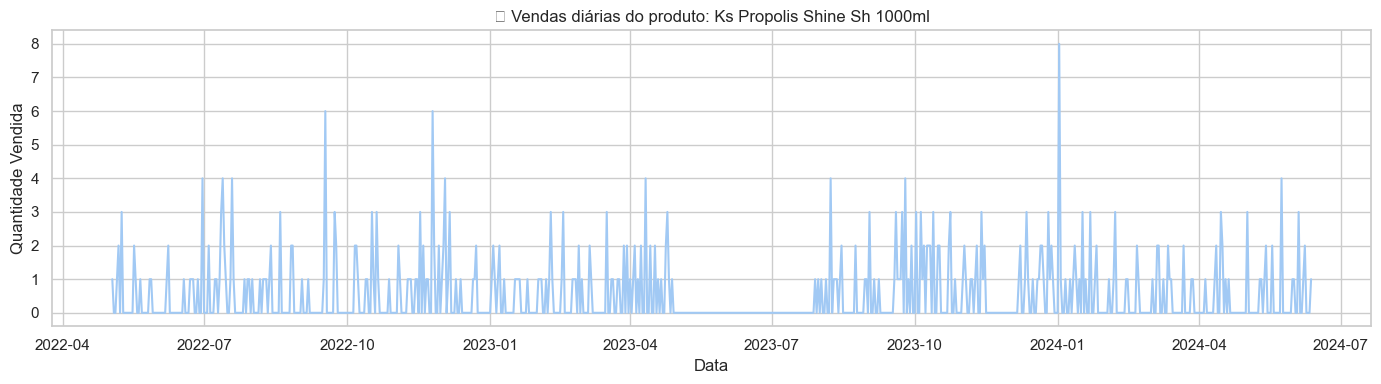

In [23]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=serie_produto, x="data_da_venda", y="qtde")
plt.title(f"📈 Vendas diárias do produto: {produto_escolhido}")
plt.xlabel("Data")
plt.ylabel("Quantidade Vendida")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\4176036965.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


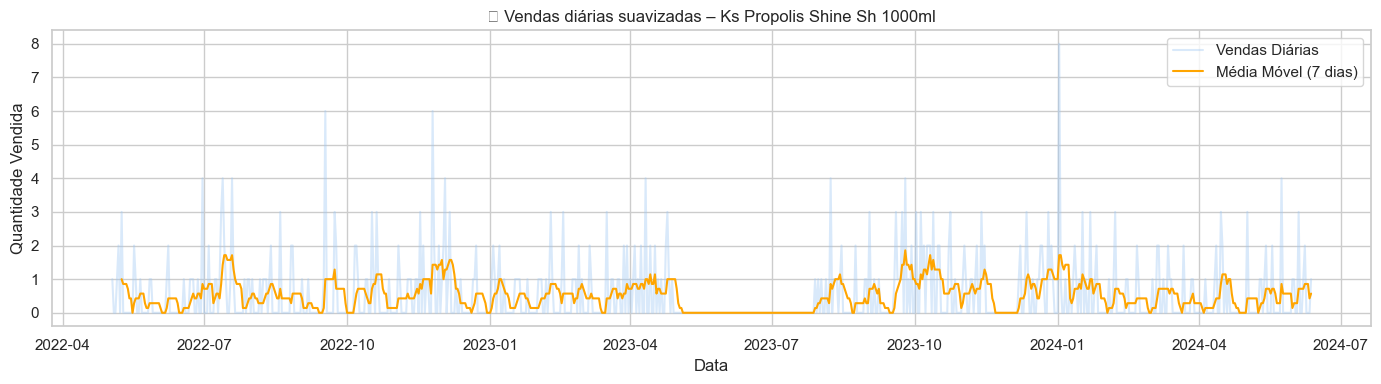

In [24]:
# Adicionar uma coluna de média móvel de 7 dias
serie_produto["media_movel_7d"] = serie_produto["qtde"].rolling(window=7).mean()

# Plot com a média móvel
plt.figure(figsize=(14, 4))
plt.plot(serie_produto["data_da_venda"], serie_produto["qtde"], label="Vendas Diárias", alpha=0.4)
plt.plot(serie_produto["data_da_venda"], serie_produto["media_movel_7d"], label="Média Móvel (7 dias)", color='orange')
plt.title(f"📈 Vendas diárias suavizadas – {produto_escolhido}")
plt.xlabel("Data")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\3505683148.py:8: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


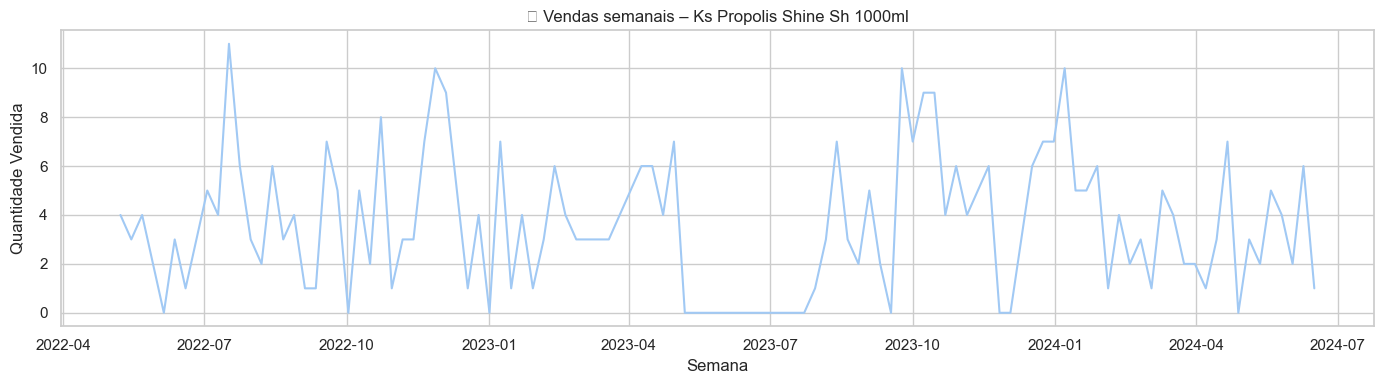

In [25]:
vendas_semanais = serie_produto.resample("W", on="data_da_venda")["qtde"].sum().reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=vendas_semanais, x="data_da_venda", y="qtde")
plt.title(f"📆 Vendas semanais – {produto_escolhido}")
plt.xlabel("Semana")
plt.ylabel("Quantidade Vendida")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\1455559971.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = serie_produto.resample("M", on="data_da_venda")["qtde"].sum().reset_index()
C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\1455559971.py:8: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\1455559971.py:8: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6

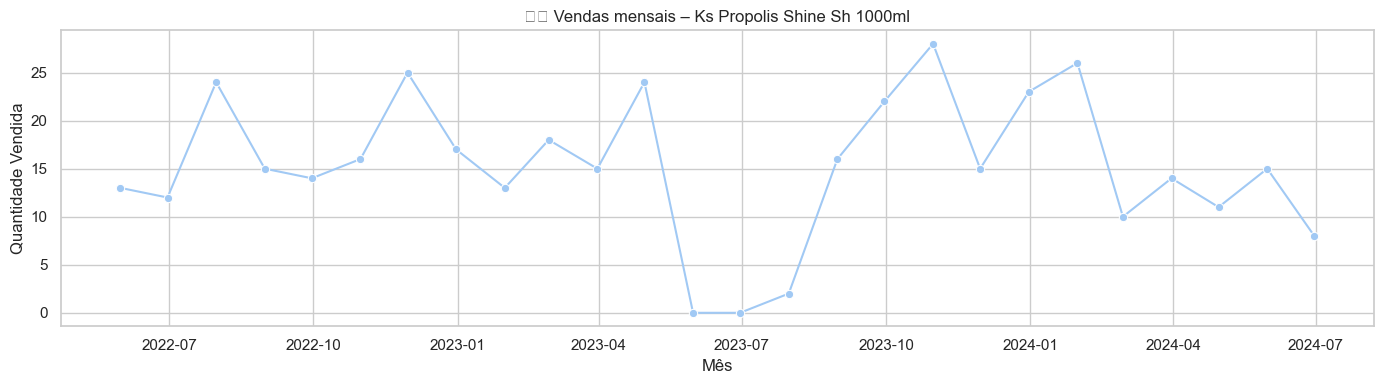

In [26]:
vendas_mensais = serie_produto.resample("M", on="data_da_venda")["qtde"].sum().reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=vendas_mensais, x="data_da_venda", y="qtde", marker="o")
plt.title(f"🗓️ Vendas mensais – {produto_escolhido}")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\3638548294.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


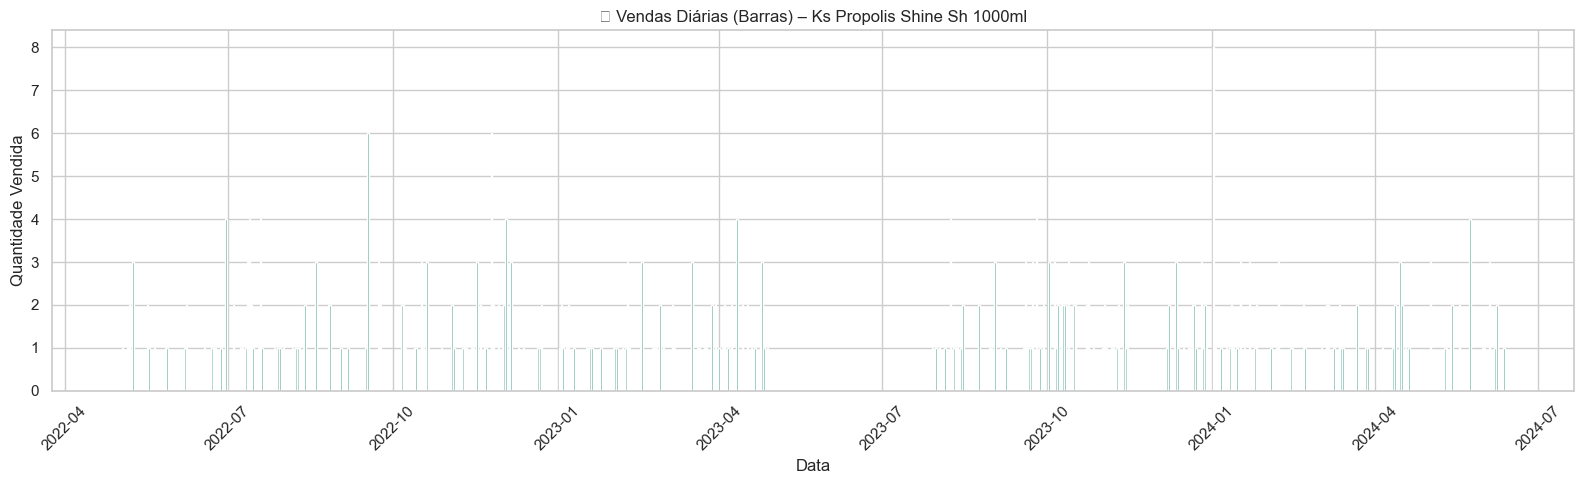

In [27]:
plt.figure(figsize=(16, 5))
plt.bar(serie_produto["data_da_venda"], serie_produto["qtde"], color="#69b3a2")

plt.title(f"📊 Vendas Diárias (Barras) – {produto_escolhido}")
plt.xlabel("Data")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Aluno Tarde\AppData\Local\Temp\ipykernel_18660\1645233748.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Aluno Tarde\Documents\GitHub\projeto_flask_colaborativo\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


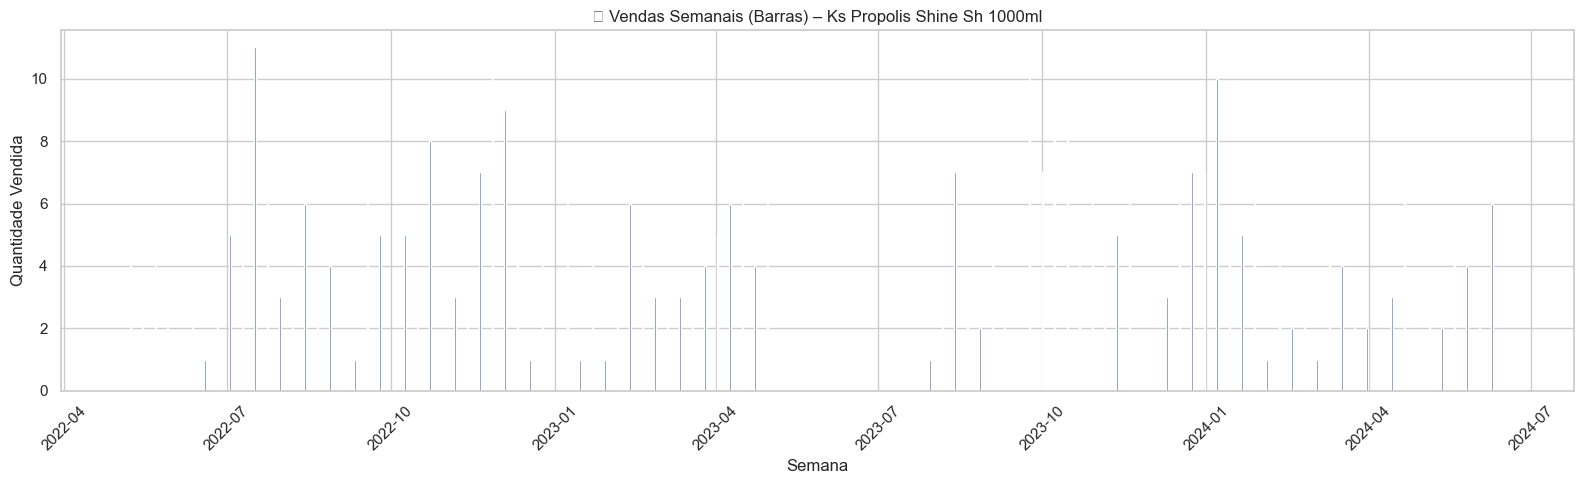

In [28]:
vendas_semanais = serie_produto.resample("W", on="data_da_venda")["qtde"].sum().reset_index()

plt.figure(figsize=(16, 5))
plt.bar(vendas_semanais["data_da_venda"], vendas_semanais["qtde"], color="#4c72b0")

plt.title(f"📊 Vendas Semanais (Barras) – {produto_escolhido}")
plt.xlabel("Semana")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# # 🧹 Limpeza básica
# df = df.dropna(subset=['total', 'qtde', 'preco_unitario', 'produto'])
# # a linha acima remove linhas com valores ausentes nas colunas especificadas.



# # 📅 Conversão de data
# df['data_da_venda'] = pd.to_datetime(df['data_da_venda'], dayfirst=True)
# # a linha acima converte a coluna 'data_da_venda' para o tipo datetime, assumindo que o dia vem antes do mês.
# df['ano'] = df['data_da_venda'].dt.year
# # a linha acima extrai o ano da coluna 'data_da_venda' e cria uma nova coluna 'ano'.
# df['mes'] = df['data_da_venda'].dt.month
# # a linha acima extrai o mês da coluna 'data_da_venda' e cria uma nova coluna 'mes'.
# df['dia'] = df['data_da_venda'].dt.day
# # a linha acima extrai o dia da coluna 'data_da_venda' e cria uma nova coluna 'dia'.
# df['dia_semana'] = df['data_da_venda'].dt.dayofweek
# # a linha acima extrai o dia da semana da coluna 'data_da_venda' e cria uma nova coluna 'dia_semana'.
# # a coluna 'dia_semana' é um número de 0 (segunda-feira) a 6 (domingo).


# # 🎯 Variável alvo
# target = 'total'

# # 🧠 Features numéricas e categóricas
# features = ['qtde', 'preco_unitario', 'ano', 'mes', 'dia', 'dia_semana',
#             'categoria', 'produto', 'fabricante', 'profissional_remunerado']

# # 🔀 Codificar variáveis categóricas
# for col in ['categoria', 'produto', 'fabricante', 'profissional_remunerado']:
#     df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# # 🧪 Separar dados
# X = df[features]
# y = df[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 🚀 Treinar modelo LightGBM
# model = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05)
# model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

# # 📈 Previsões
# y_pred = model.predict(X_test)

# # 📊 Avaliação
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# print(f"✅ RMSE: {rmse:.2f}")
# print(f"✅ R² Score: {r2:.2%}")

# # 🔍 Importância das features
# importancias = pd.DataFrame({'Feature': X.columns, 'Importância': model.feature_importances_})
# importancias = importancias.sort_values(by='Importância', ascending=False)

# # 📊 Plotar importância
# plt.figure(figsize=(10,6))
# sns.barplot(x='Importância', y='Feature', data=importancias)
# plt.title('Importância das Variáveis - LightGBM')
# plt.tight_layout()
# plt.show()
